# Introduction 

The use of machine learning algorithms has become increasingly popular in the finance industry, particularly in the banking sector. One area where machine learning can be applied is in predicting whether a customer is likely to make a deposit or not. This prediction can help banks to better understand the behavior of their customers and make more informed decisions about lending.

In this project, we will be using a bank dataset to predict whether a customer make a deposit or not. We will be exploring different machine learning algorithms such as decision tree, K-nearest neighbors (KNN), logistic regression, and support vector machine (SVM) to determine which algorithm performs best for this particular problem.

Our goal is to build a predictive model that accurately identifies which customers are likely to make a deposit , based on their demographic and financial information. This model will be valuable for banks to identify potential customers who may be interested in making a deposit , as well as for assessing credit risk and making lending decisions. By leveraging machine learning techniques, we can improve the accuracy and efficiency of these processes, and ultimately provide better service to our customers.

# Problem Statement 

The problem statement for this machine learning project is to predict whether a customer will make a deposit or not based on their demographic and financial information.
we aim to build a predictive model that accurately identifies which customers are likely make a deposit . This model will help banks to make more informed lending decisions, assess credit risk, and identify potential customers who may be interested in taking out a loan.

To summarize the Problem statement we are bulding a Machine learning Model to predict weather the user will make a deposit or not . 

### Firstly we have to import necessary Libraries for our Prediction 

In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Dataset from which Algorithm can be Trained

### Bank Dataset 

In [2]:
df = pd.read_csv(r"C:\Users\abhij\Desktop\Machine Learning\Practice Files\bank.csv")

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


### Data Description 

The data contains 17 columns and multiple rows which describe the information of customers

It consists of diffrent columns 

In [4]:
df.columns 

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

### Now the next step is to check the null values in the data

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

### Now the next step is to check the info of the data 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


All the data is in integer form so it is eazy to apply algorithm otherwise we have to encode the data 

## NOTE -:

There are no unwanted columns which we have to remove so we will proceed with the Training Process 

## Now we will build some  insights from the data through various graphical representation 

### count plot

This Graph represents on which day most of the deposits are made 

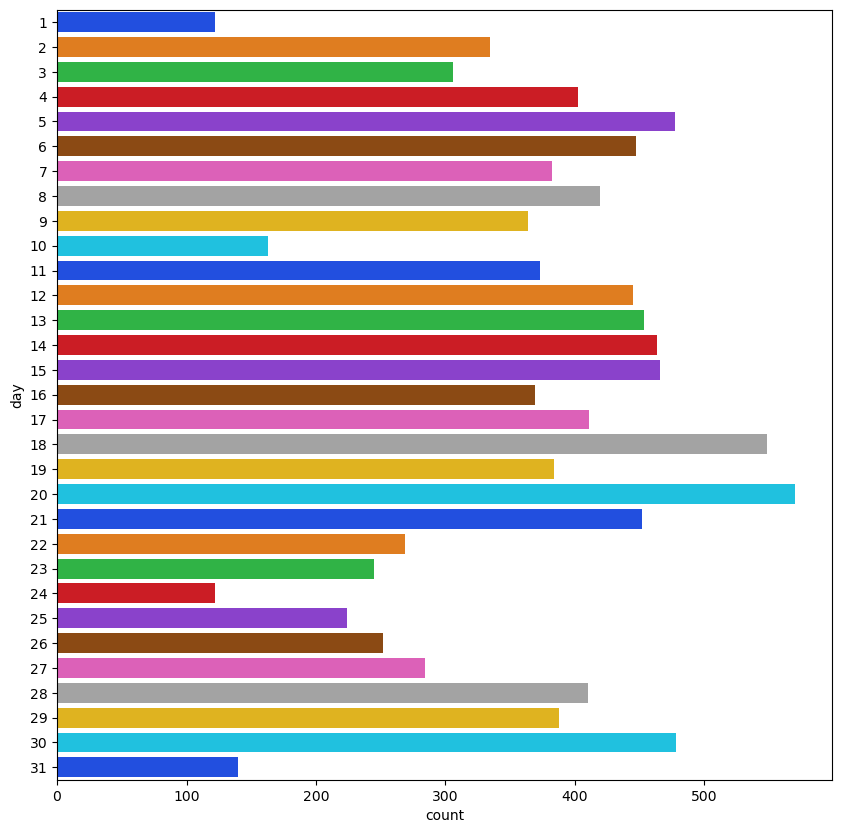

In [47]:
plt.figure(figsize=(10,10))
sns.countplot(y='day',data=df,dodge=False,palette='bright')
plt.show()

This graph shows the ratio of married and unmarried people who have made the deposits 

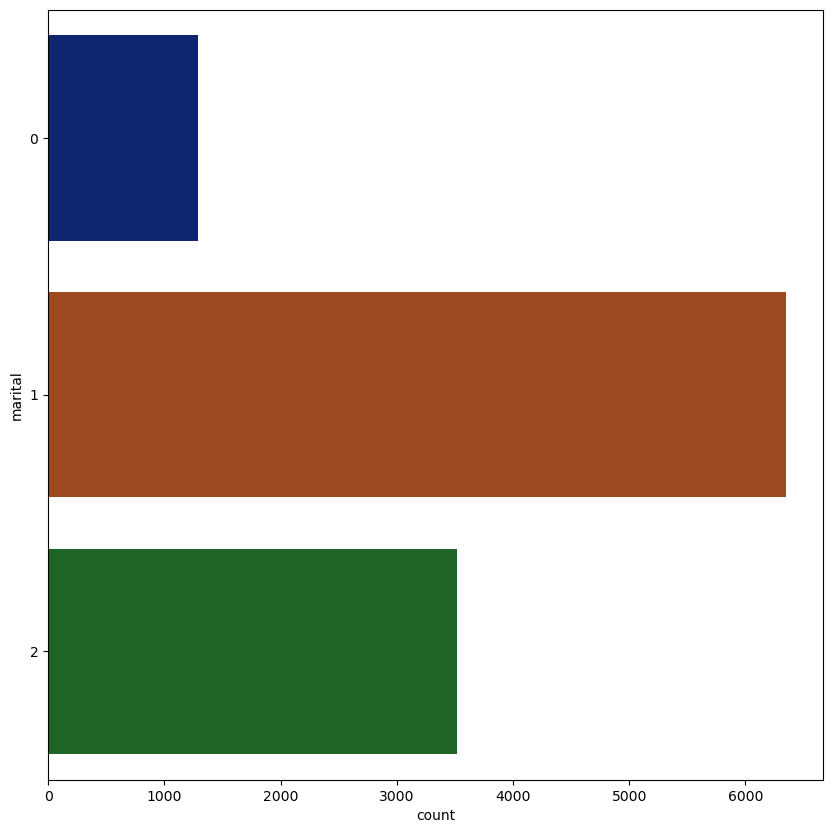

In [52]:
plt.figure(figsize=(10,10))
sns.countplot(y='marital',data=df,dodge=False,palette='dark')
plt.show()

### Regression line 

<Figure size 600x700 with 0 Axes>

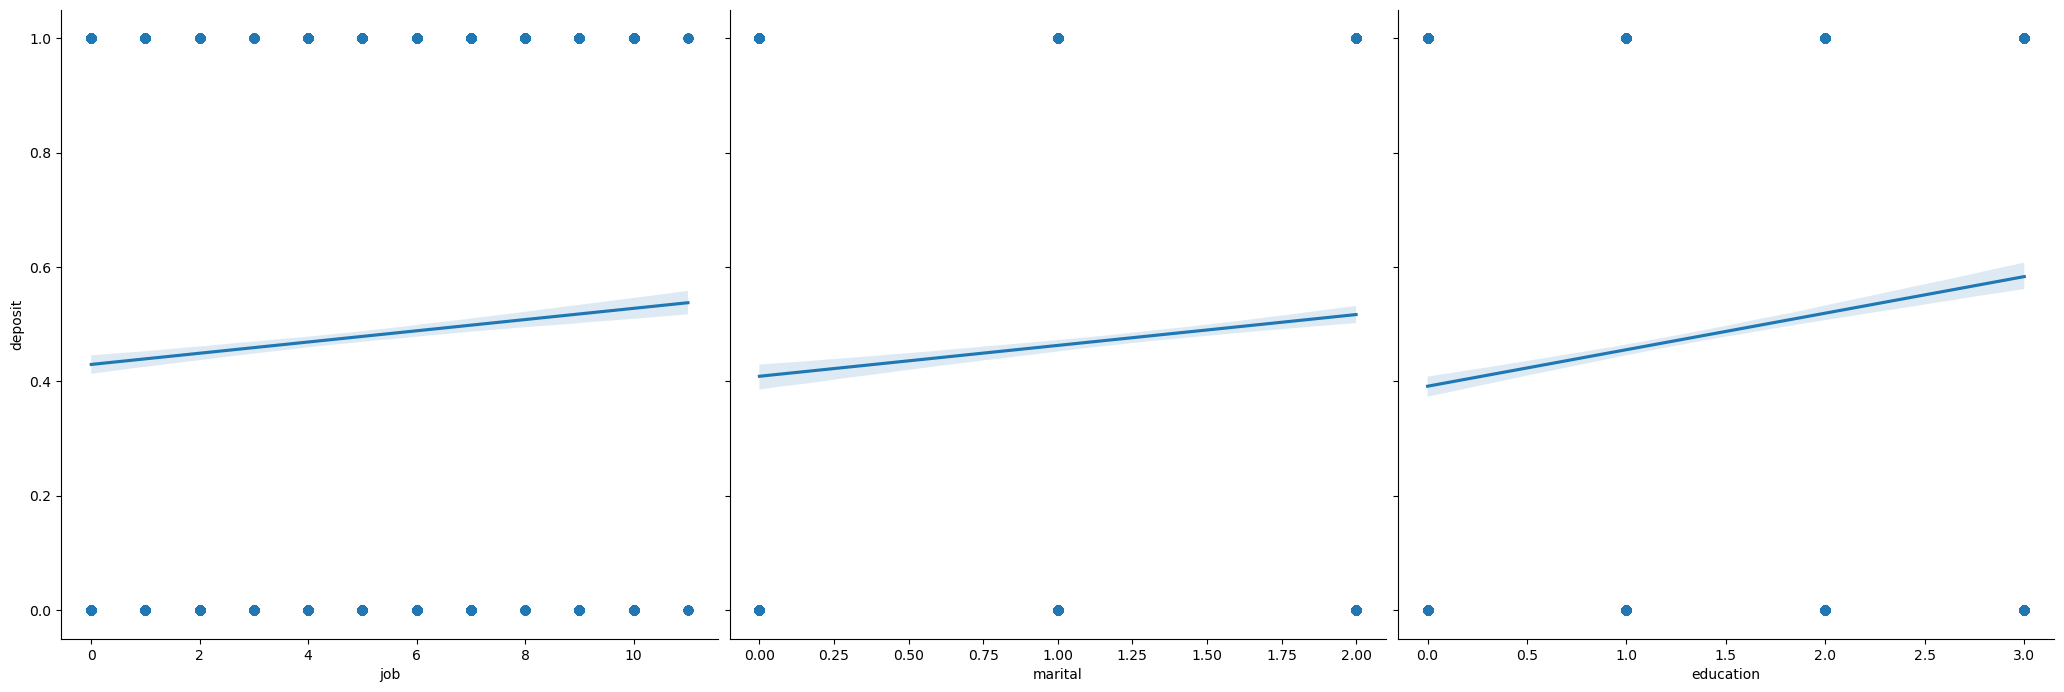

In [64]:
plt.figure(figsize=(6,7))
sns.pairplot( x_vars=[ 'job', 'marital', 'education'],y_vars='deposit',size=7,kind='reg',data=df)
plt.show()

<Figure size 600x700 with 0 Axes>

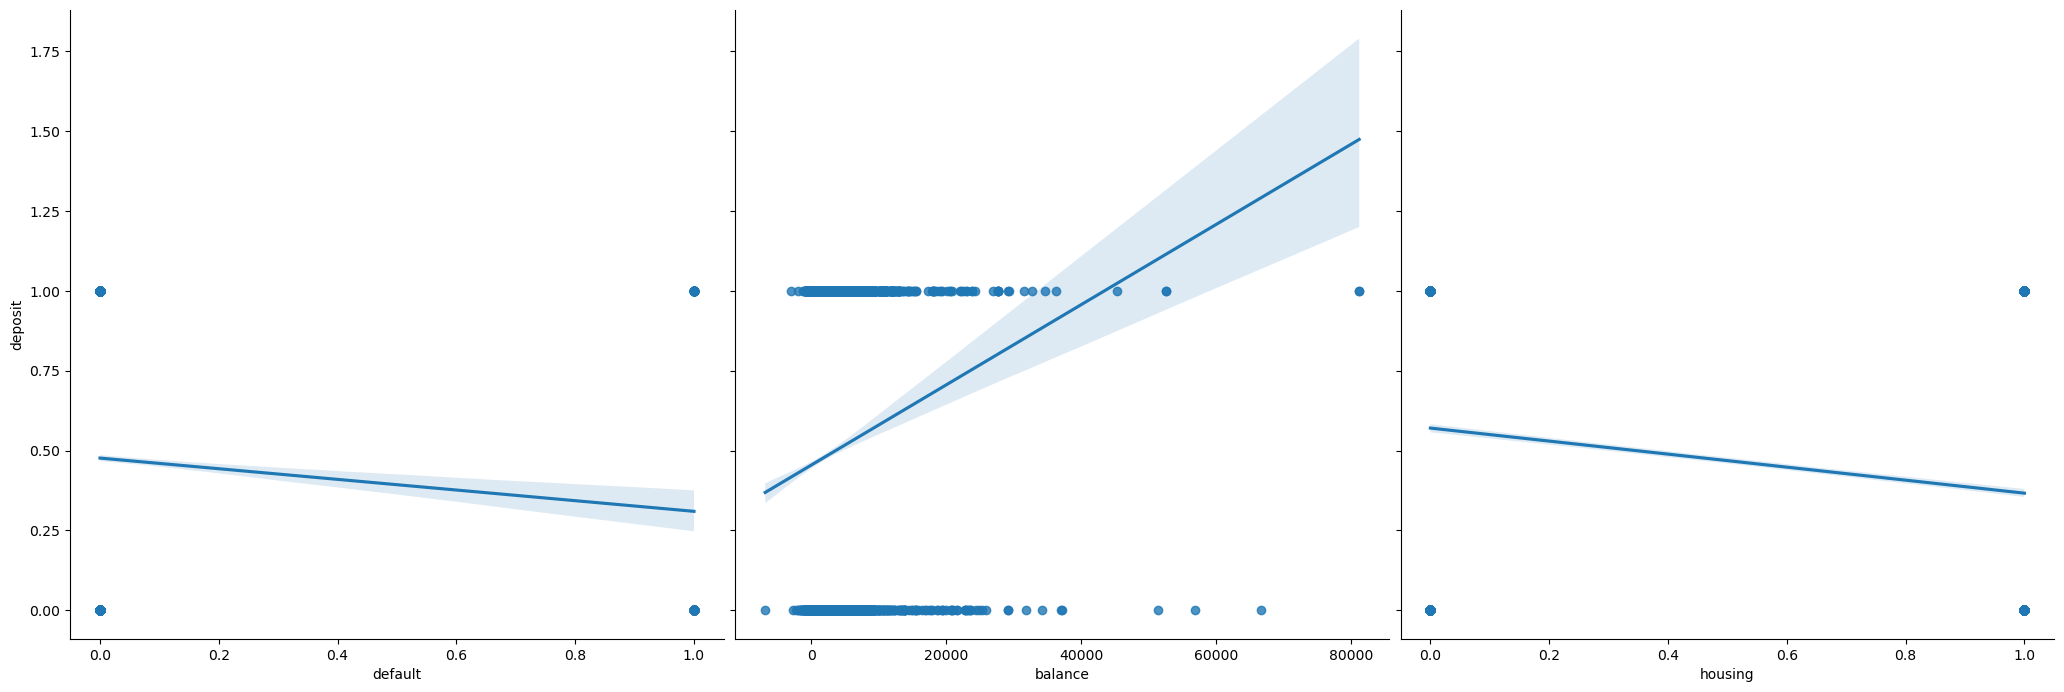

In [67]:
plt.figure(figsize=(6,7))
sns.pairplot( x_vars=['default', 'balance', 'housing'],y_vars='deposit',size=7,kind='reg',data=df)
plt.show()

<Figure size 600x700 with 0 Axes>

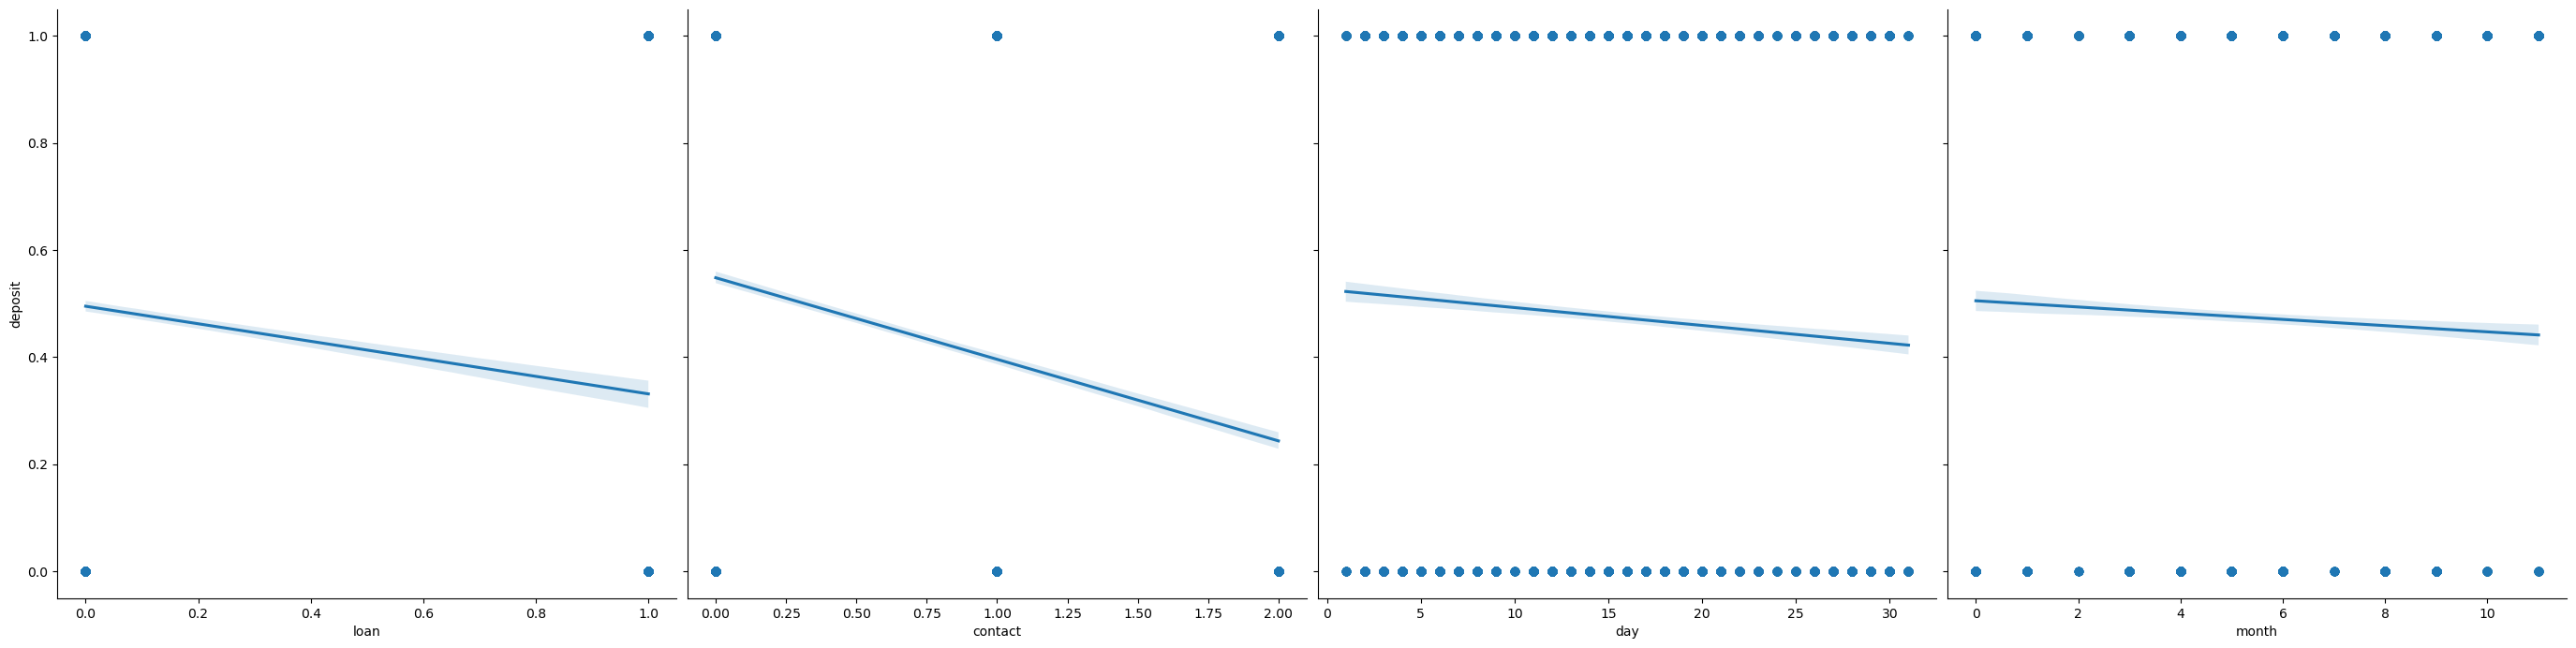

In [68]:
plt.figure(figsize=(6,7))
sns.pairplot( x_vars=['loan', 'contact', 'day', 'month'],y_vars='deposit',size=7,kind='reg',data=df)
plt.show()

<Figure size 600x700 with 0 Axes>

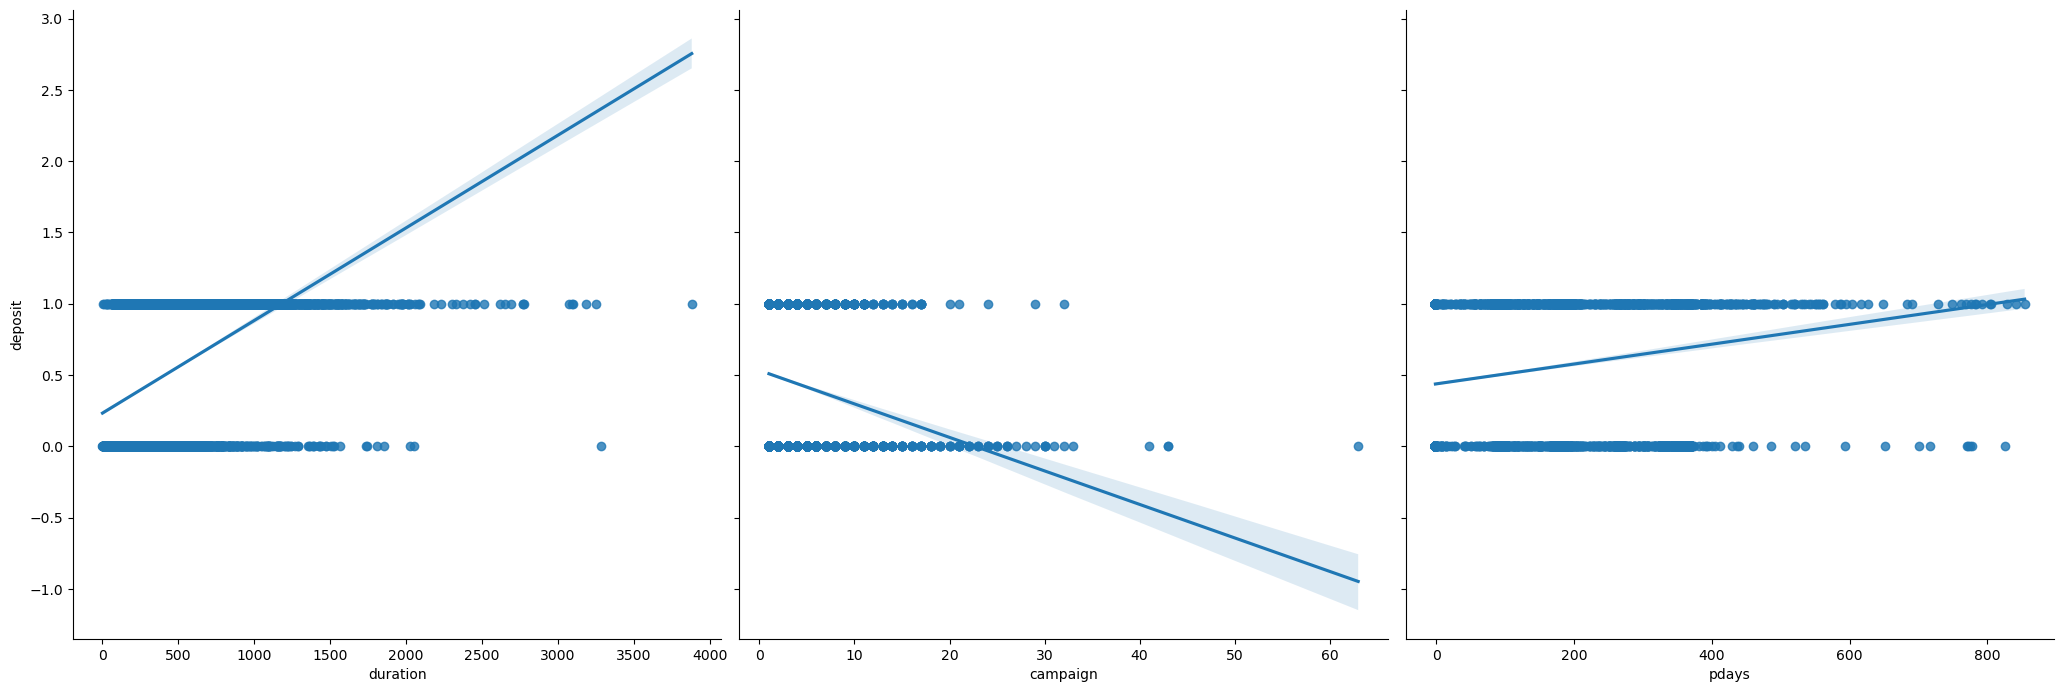

In [69]:
plt.figure(figsize=(6,7))
sns.pairplot( x_vars=['duration', 'campaign', 'pdays'],y_vars='deposit',size=7,kind='reg',data=df)
plt.show()

<Figure size 600x700 with 0 Axes>

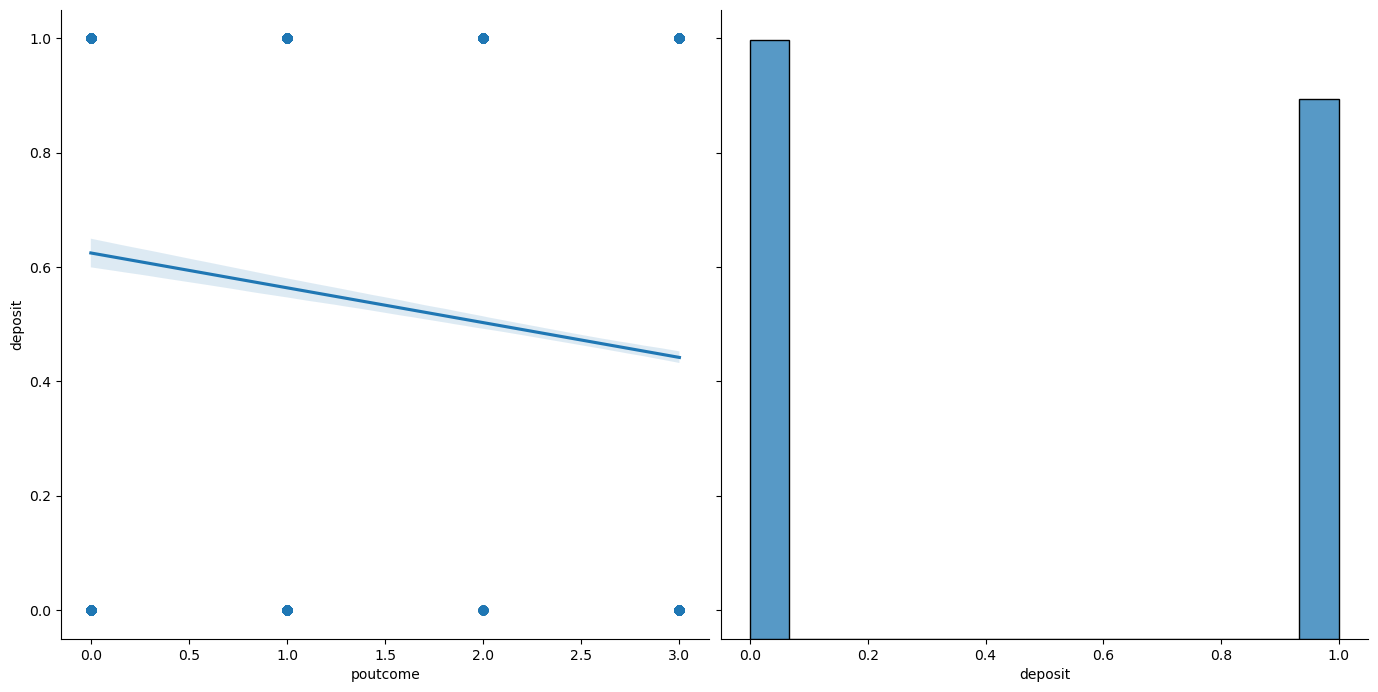

In [73]:
plt.figure(figsize=(6,7))
sns.pairplot( x_vars=[ 'poutcome', 'deposit'],y_vars='deposit',size=7,kind='reg',data=df)
plt.show()

as you can see from all the regression line is good enough for the statistical prediction purpose only there is some disformity in the "balance" section but we will ignore it as account balce can differ from person to person .

### Pie charts

An infromation that provides ratio beetween how many people are married and unmarried 

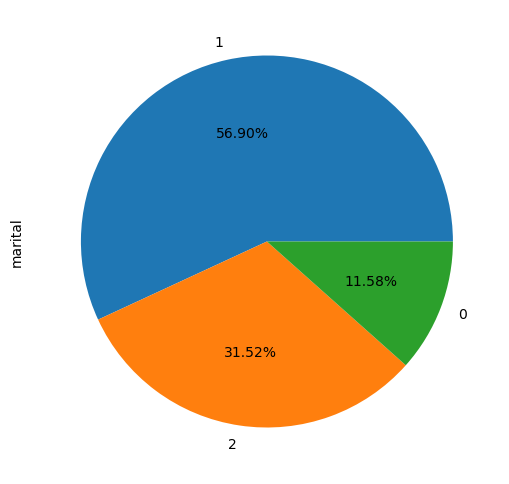

In [77]:
plt.figure(figsize=(6,7))
df['marital'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

This displays if the person is having a loan or not here the conclusion that 13% of the people are  having loan 

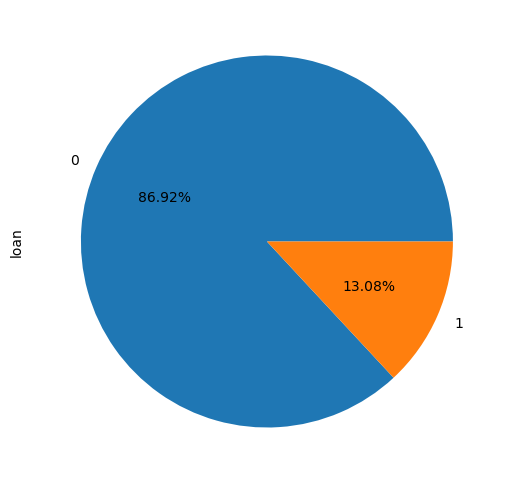

In [79]:
plt.figure(figsize=(6,7))
df['loan'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

### Correlation

Let us see how the elements are correlated with each other 

In [54]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
age,1.000000,-0.031603,-0.442782,-0.126018,-0.011425,0.112300,-0.168700,-0.031418,0.027762,-0.000762,-0.026130,0.000189,-0.005278,0.002774,0.020169,-0.002699,0.034901
job,-0.031603,1.000000,0.078314,0.147046,-0.007066,0.028736,-0.136965,-0.067092,-0.087915,0.026589,-0.076011,0.002432,0.003104,-0.003385,0.012665,-0.004238,0.063395
marital,-0.442782,0.078314,1.000000,0.125845,-0.014691,-0.002138,-0.036345,-0.062029,-0.060456,-0.003642,-0.004070,0.006781,-0.030794,0.031200,0.031281,-0.039424,0.067610
education,-0.126018,0.147046,0.125845,1.000000,-0.010709,0.051728,-0.109168,-0.073154,-0.132540,0.016759,-0.055868,-0.019122,-0.005327,0.025165,0.022427,-0.040262,0.095948
default,-0.011425,-0.007066,-0.014691,-0.010709,1.000000,-0.060954,0.011076,0.076434,0.035709,0.017342,0.000950,-0.009760,0.030975,-0.036282,-0.035273,0.042357,-0.040680
balance,0.112300,0.028736,-0.002138,0.051728,-0.060954,1.000000,-0.077092,-0.084589,-0.027295,0.010467,0.007264,0.022436,-0.013894,0.017411,0.030805,-0.027151,0.081129
housing,-0.168700,-0.136965,-0.036345,-0.109168,0.011076,-0.077092,1.000000,0.076761,0.226392,-0.014770,0.219602,0.035051,0.006660,0.064497,-0.000840,-0.046370,-0.203888
loan,-0.031418,-0.067092,-0.062029,-0.073154,0.076434,-0.084589,0.076761,1.000000,0.006829,0.017269,0.025329,-0.001914,0.034722,-0.030416,-0.022668,0.026344,-0.110580
contact,0.027762,-0.087915,-0.060456,-0.132540,0.035709,-0.027295,0.226392,0.006829,1.000000,0.007943,0.289803,-0.018000,0.059258,-0.227785,-0.169919,0.257993,-0.249847
day,-0.000762,0.026589,-0.003642,0.016759,0.017342,0.010467,-0.014770,0.017269,0.007943,1.000000,-0.019840,-0.018511,0.137007,-0.077232,-0.058981,0.080221,-0.056326


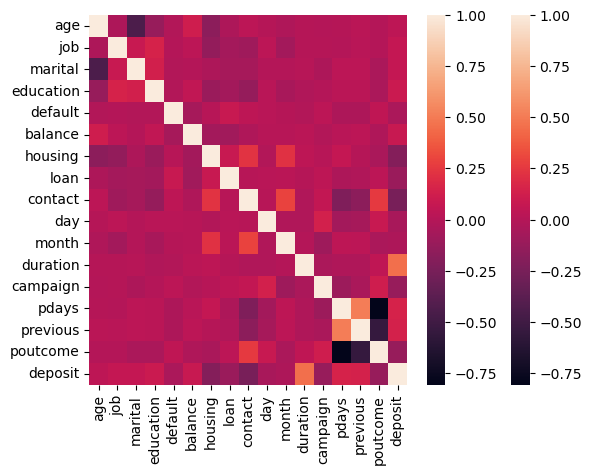

In [56]:
sns.heatmap(df.corr())
plt.show()

#### So the conclusion is that no columns will be removed as every column in the data have some information which will be helpful in future prediction 

### The Training Process 

#### firstly splitting the target and features 

In [7]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

### importing a Train Test Split Model 

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In the above code i have just imported the train_test_split model 
         and         
applied the model to the dataset in 70 : 30 ratio so that the machine will take learnings from 70 % of the data and make a testing on 30 % of the data and hence make a optimum conclusion 

# Algorithms 

### now the next step is to import diffrent algorithms 

In [9]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 

### assining shortform to algorithims 

In [10]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svm = SVC()

### importing metrics for Evaluation 

In [11]:
from sklearn.metrics import classification_report,accuracy_score,r2_score

## Building a Class named Mymodel so that the accuracies can be easily predicted 

In [12]:
def mymodel(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("accuracy socre :",accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    
    train  = model.score(X_train,y_train)
    test  = model.score(X_test,y_test)
    print("training performance  = ",train )
    print('testing  performance = ',test)

### Applying diffrent algorithms on the Class to check accuracy of each and finding the best and most accurate Algorithm for Prediction 

# LogisticRegression

In [13]:
mymodel(logreg)

accuracy socre : 0.7653030755449388
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1760
           1       0.76      0.73      0.75      1589

    accuracy                           0.77      3349
   macro avg       0.77      0.76      0.76      3349
weighted avg       0.77      0.77      0.76      3349

training performance  =  0.7554076539101497
testing  performance =  0.7653030755449388


# KNeighborsClassifier

In [14]:
mymodel(knn)

accuracy socre : 0.7539564048969841
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1760
           1       0.75      0.72      0.74      1589

    accuracy                           0.75      3349
   macro avg       0.75      0.75      0.75      3349
weighted avg       0.75      0.75      0.75      3349

training performance  =  0.81889159093818
testing  performance =  0.7539564048969841


# DecisionTreeClassifier

In [15]:
mymodel(dt)

accuracy socre : 0.787996416840848
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1760
           1       0.78      0.77      0.78      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349

training performance  =  1.0
testing  performance =  0.787996416840848


# SVM

In [16]:
mymodel(svm)

accuracy socre : 0.7414153478650344
              precision    recall  f1-score   support

           0       0.72      0.84      0.77      1760
           1       0.78      0.63      0.70      1589

    accuracy                           0.74      3349
   macro avg       0.75      0.74      0.74      3349
weighted avg       0.75      0.74      0.74      3349

training performance  =  0.7382567515678996
testing  performance =  0.7414153478650344


# Observation 

As from all the models i can conclude that the best and the accurate model is Decision Tree where the accuracy is 78.38 % so i will proceed with this Algorithm 

In [17]:
mymodel(dt)

accuracy socre : 0.783517467900866
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1760
           1       0.78      0.76      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349

training performance  =  1.0
testing  performance =  0.783517467900866


There is a huge diffrence beetween the Training and Testing performance let us minimize it by using Hyperparameter tuning on diffrent tools present in Decision Tree like max depth , min sample split , and max_leaf_nodes 

### Performing hyper parameter tuning using Loop Function 

### Max depth 

In [18]:
for i in range (1,51):
    dt1 = DecisionTreeClassifier(max_depth = i)
    dt1.fit(X_train,y_train)
    y_pred=dt1.predict(X_test)
    ac = accuracy_score(y_test,y_pred)
    print(f"max depth {i}    accuracy  = { ac }")

max depth 1    accuracy  = 0.7121528814571514
max depth 2    accuracy  = 0.7121528814571514
max depth 3    accuracy  = 0.771275007464915
max depth 4    accuracy  = 0.78501045088086
max depth 5    accuracy  = 0.798745894296805
max depth 6    accuracy  = 0.8014332636607943
max depth 7    accuracy  = 0.8151687070767393
max depth 8    accuracy  = 0.8196476560167214
max depth 9    accuracy  = 0.8124813377127501
max depth 10    accuracy  = 0.8196476560167214
max depth 11    accuracy  = 0.820244849208719
max depth 12    accuracy  = 0.8151687070767393
max depth 13    accuracy  = 0.8074051955807704
max depth 14    accuracy  = 0.7999402806808003
max depth 15    accuracy  = 0.8008360704687967
max depth 16    accuracy  = 0.7939683487608241
max depth 17    accuracy  = 0.792773962376829
max depth 18    accuracy  = 0.7939683487608241
max depth 19    accuracy  = 0.7912809793968348
max depth 20    accuracy  = 0.7906837862048373
max depth 21    accuracy  = 0.786503433860854
max depth 22    accuracy  = 0

### Minimum sample split 

In [19]:
for i in range(2,101):
    dt1 = DecisionTreeClassifier(min_samples_split=i)
    dt1.fit(X_train,y_train)
    y_pred= dt1.predict(X_test)
    ac = accuracy_score(y_test,y_pred)
    print(f"min sample split  {i}  acuuracy {ac}")

min sample split  2  acuuracy 0.782024484920872
min sample split  3  acuuracy 0.7838160644968647
min sample split  4  acuuracy 0.787996416840848
min sample split  5  acuuracy 0.7868020304568528
min sample split  6  acuuracy 0.786503433860854
min sample split  7  acuuracy 0.7903851896088384
min sample split  8  acuuracy 0.7963571215288145
min sample split  9  acuuracy 0.786503433860854
min sample split  10  acuuracy 0.7948641385488205
min sample split  11  acuuracy 0.7954613317408181
min sample split  12  acuuracy 0.7885936100328457
min sample split  13  acuuracy 0.7936697521648253
min sample split  14  acuuracy 0.7939683487608241
min sample split  15  acuuracy 0.7948641385488205
min sample split  16  acuuracy 0.8005374738727978
min sample split  17  acuuracy 0.8023290534487907
min sample split  18  acuuracy 0.8047178262167811
min sample split  19  acuuracy 0.808002388772768
min sample split  20  acuuracy 0.806509405792774
min sample split  21  acuuracy 0.8115855479247537
min sample spl

### Max leaf nodes 

In [20]:
for i in range(2,121):
    dt1 = DecisionTreeClassifier(max_leaf_nodes=i)
    dt1.fit(X_train,y_train)
    y_pred= dt1.predict(X_test)
    ac = accuracy_score(y_test,y_pred)
    print(f"max_leaf_nodes  {i}  acuuracy {ac}")

max_leaf_nodes  2  acuuracy 0.7121528814571514
max_leaf_nodes  3  acuuracy 0.7121528814571514
max_leaf_nodes  4  acuuracy 0.7563451776649747
max_leaf_nodes  5  acuuracy 0.7608241266049567
max_leaf_nodes  6  acuuracy 0.7608241266049567
max_leaf_nodes  7  acuuracy 0.7775455359808898
max_leaf_nodes  8  acuuracy 0.775753956404897
max_leaf_nodes  9  acuuracy 0.775753956404897
max_leaf_nodes  10  acuuracy 0.7784413257688862
max_leaf_nodes  11  acuuracy 0.7784413257688862
max_leaf_nodes  12  acuuracy 0.7853090474768588
max_leaf_nodes  13  acuuracy 0.7862048372648551
max_leaf_nodes  14  acuuracy 0.7862048372648551
max_leaf_nodes  15  acuuracy 0.7960585249328158
max_leaf_nodes  16  acuuracy 0.8011346670647954
max_leaf_nodes  17  acuuracy 0.8011346670647954
max_leaf_nodes  18  acuuracy 0.8011346670647954
max_leaf_nodes  19  acuuracy 0.8062108091967751
max_leaf_nodes  20  acuuracy 0.8103911615407584
max_leaf_nodes  21  acuuracy 0.817258883248731
max_leaf_nodes  22  acuuracy 0.8196476560167214
max

In [21]:
dt_new  = DecisionTreeClassifier(criterion='entropy',min_samples_split=100,max_depth=8,min_samples_leaf=41)

In [22]:
mymodel(dt_new)

accuracy socre : 0.8145715138847417
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1760
           1       0.80      0.81      0.81      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

training performance  =  0.829002943811596
testing  performance =  0.8145715138847417


so by performing Hyperparameter tuning using loop we are able to minimize the difrrence in training and testing  performance  

training performance  =  0.829002943811596        


testing  performance =  0.8145715138847417 


training performance - testing  performance  = 0.014431429926854311

# Conclusion 

In this machine learning project, we explored the use of different algorithms such as decision tree, K-nearest neighbors (KNN), logistic regression, and support vector machine (SVM) to predict whether a customer is likely to make a deposit or not. We used a bank dataset containing demographic and financial information to train and test our models.

Through our experimentation, we found that Decision tree algorithm performed the best with the highest accuracy score. This model can be used by banks to identify potential customers who are likely to make a deposit or not, assess credit risk, and make more informed lending decisions.

Overall, this project demonstrates the effectiveness of machine learning algorithms in the finance industry, particularly in the banking sector. By leveraging these techniques, we can improve the accuracy and efficiency of lending processes, ultimately providing better service to our customers. Future work could include exploring the use of other algorithms or incorporating additional features into the model to further improve its accuracy.